In [17]:
%pip install matplotlib seaborn plotly

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.6 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.8 MB 1.7 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.8 MB 1.4 MB/s eta 0:00:07
   ----- ---------------------------------- 1.3/9.8 MB 1.2 MB/s eta 0:00:07
   ----- ---------------------------------- 1.3/9.8 MB 1.2 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/9.8 MB 1.1 MB/s eta 0:00:08
   ------- -------------------------------- 1.8/9.8 MB 1.1 MB/s eta 0:00:08
   --------- ------------------------------ 2.4/9.8 MB 1.2 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/9.8 MB 1.2 MB/s eta 0:00:06
   ----------- ---------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading Data

In [4]:
%pwd

'd:\\Github\\DS_AI_Class_notes\\Machine_learning'

In [6]:
data = pd.read_csv('AQI-and-Lat-Long-of-Countries.csv')
data.head()

AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0         51             1               36              0               51   
1         41             1                5              1               41   
2         41             1                5              1               41   
3         66             1               39              2               66   
4         34             1               34              0               20   

       lat      lng  
0  44.7444  44.2031  
1  -5.2900 -44.4900  
2 -11.2958 -41.9869  
3  37.1667  15.1833  
4  53.0167  20.8833

# EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AQI Value        16695 non-null  int64  
 1   CO AQI Value     16695 non-null  int64  
 2   Ozone AQI Value  16695 non-null  int64  
 3   NO2 AQI Value    16695 non-null  int64  
 4   PM2.5 AQI Value  16695 non-null  int64  
 5   lat              16695 non-null  float64
 6   lng              16695 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 913.1 KB


In [8]:
data = data.dropna()
data.columns = [col.strip().lower() for col in data.columns]

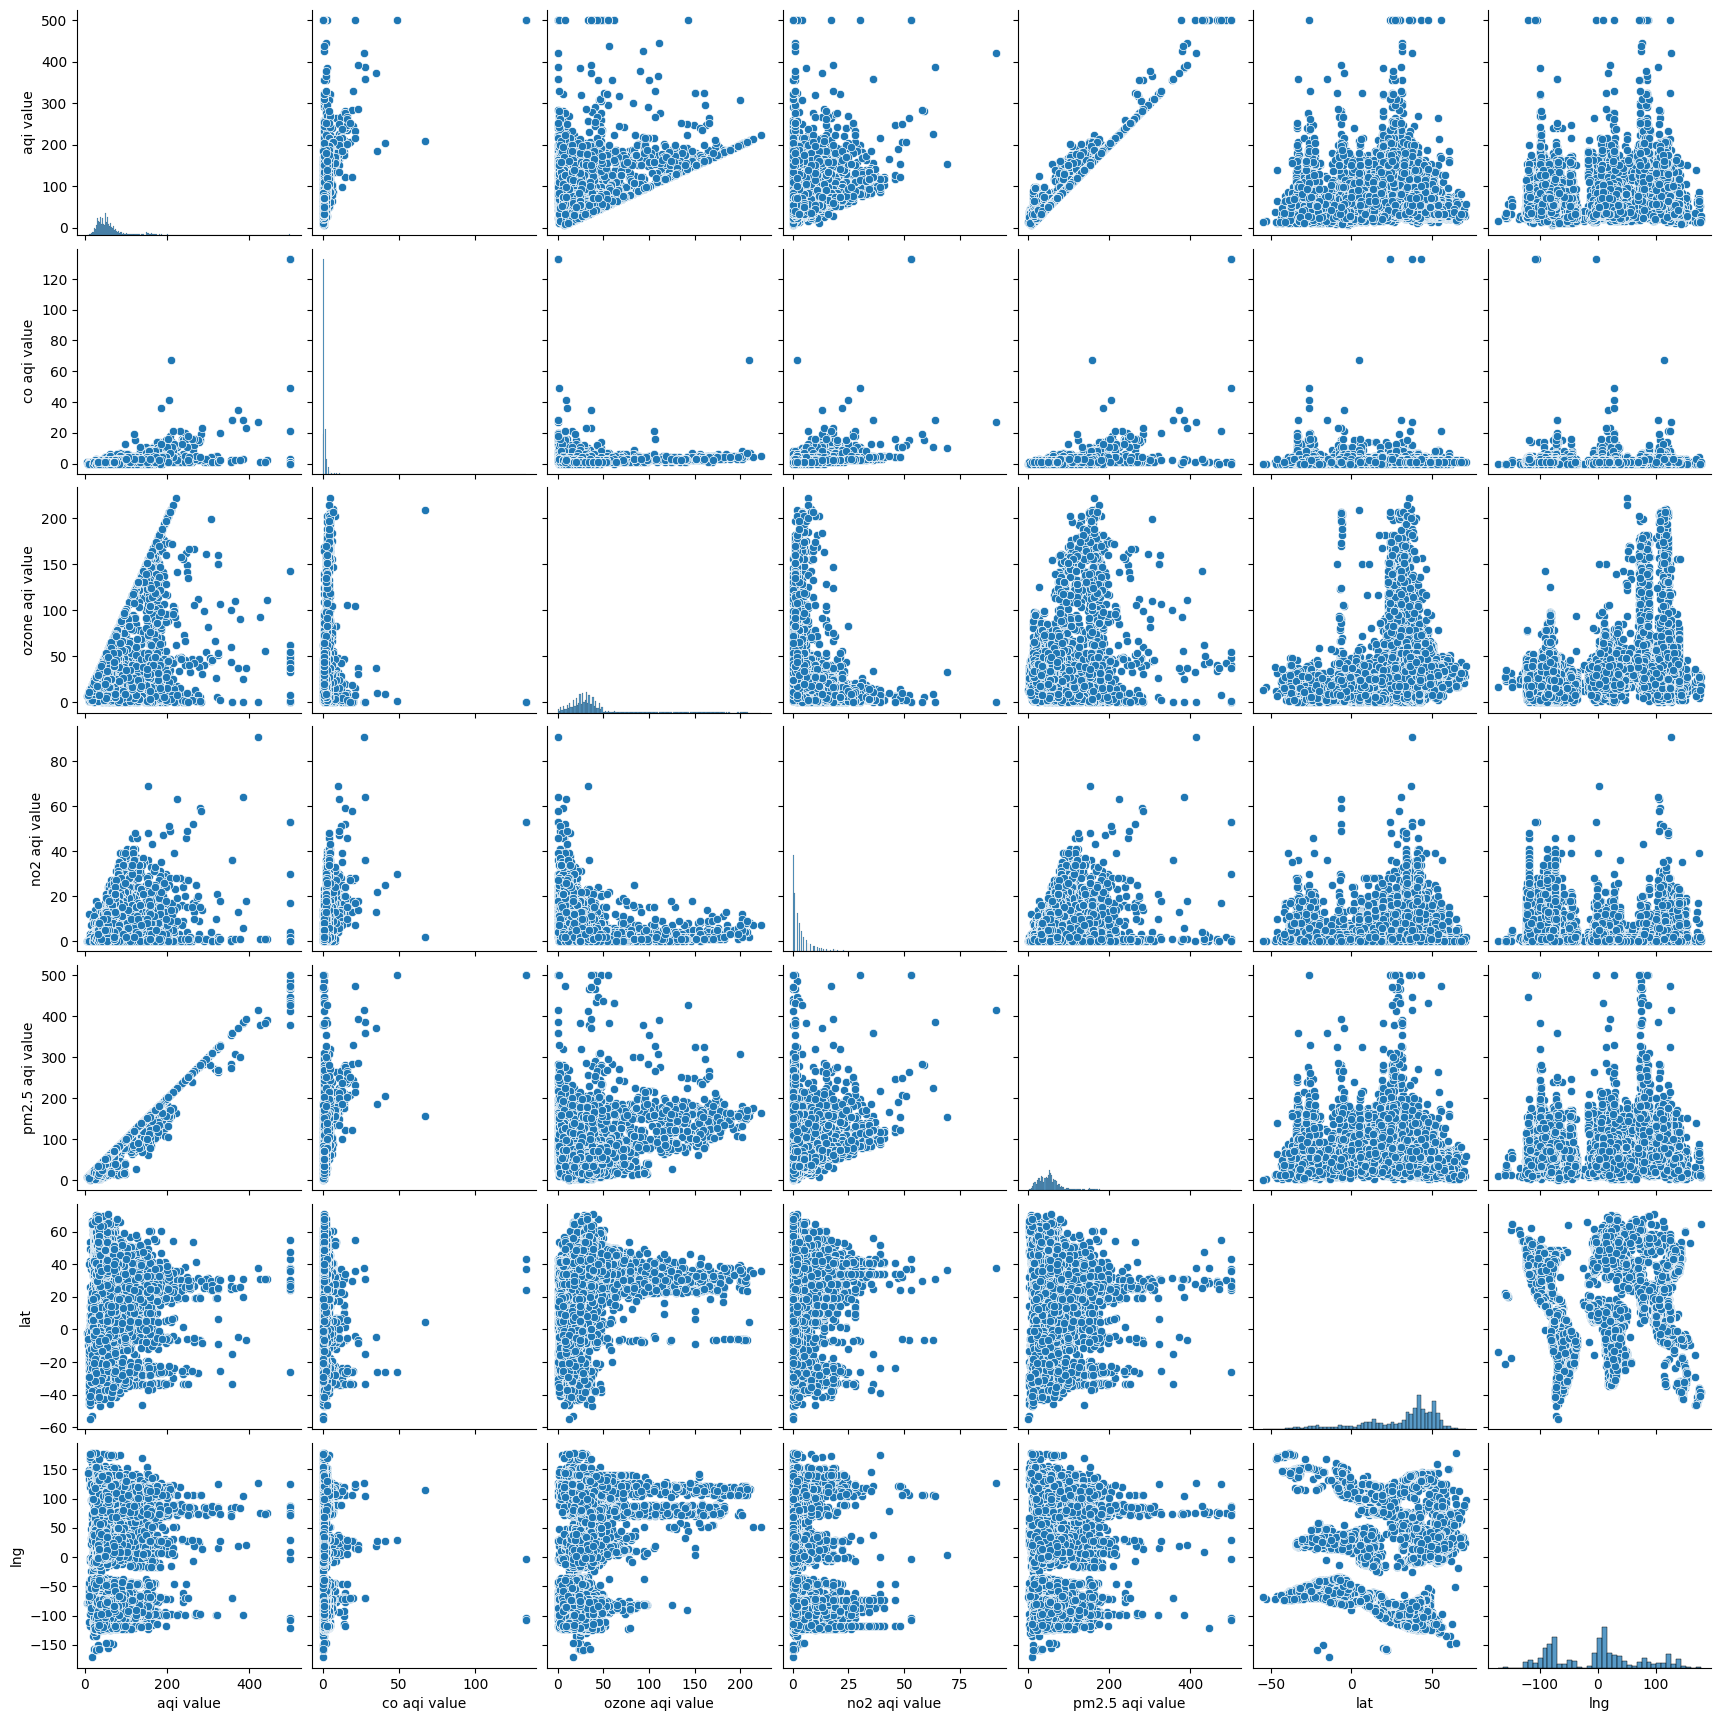

<Axes: >

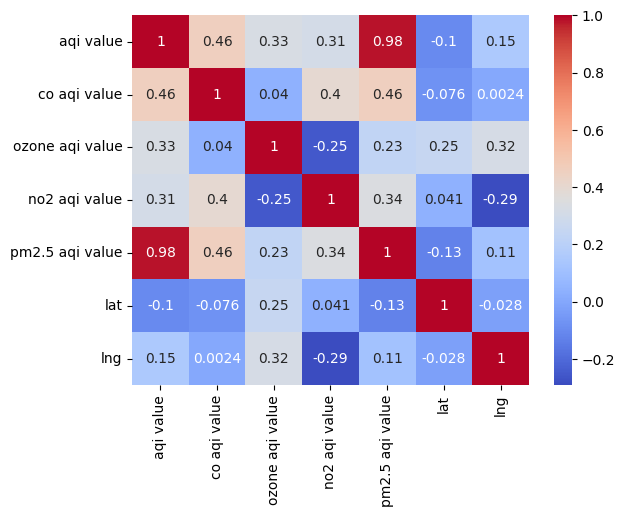

In [9]:
sns.pairplot(data)
plt.show()

corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [10]:
X = data[['co aqi value', 'ozone aqi value', 'no2 aqi value', 'pm2.5 aqi value']]
y = data['aqi value']

# Splitting the Data into train test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Random forest model

In [18]:
X_train.head()

co aqi value  ozone aqi value  no2 aqi value  pm2.5 aqi value
408               0               19              0               27
13604             3               14             18               69
4044              1                6              1               37
15185             1               37              3               59
11096             2                5              5               59

In [12]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.08944893680742742
Mean Squared Error: 2.5933745732255167
R2 Score: 0.9984363282525895


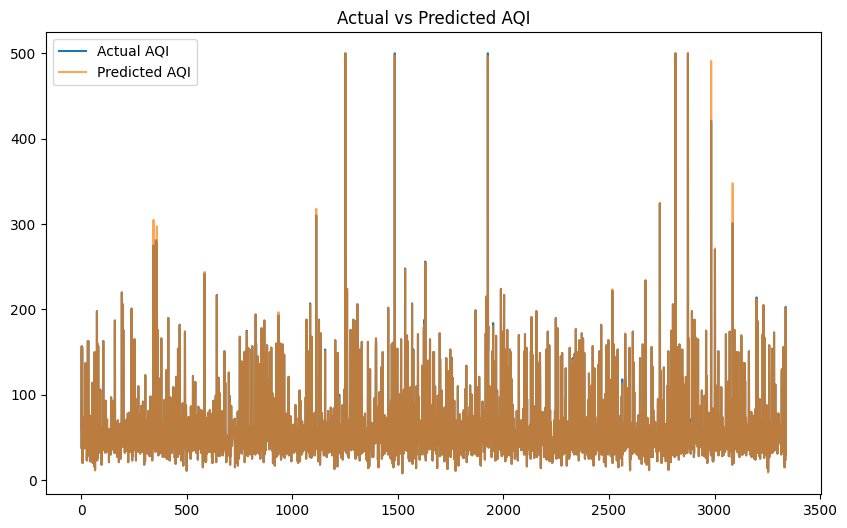

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual AQI')
plt.plot(y_pred, label='Predicted AQI', alpha=0.7)
plt.title('Actual vs Predicted AQI')
plt.legend()
plt.show()

# Saving the model in a pickle file

In [16]:
import pickle

with open('air_quality.pkl', 'wb') as file:
    pickle.dump(model,file)